In [67]:
import pandas
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['xtick.labelsize'] = '14'
plt.rcParams['ytick.labelsize'] = '14'

%matplotlib notebook

In [68]:
# Replace this variable accordingly 
path_to_results = "../../experiments/bivariate/2018-11-16-20-39_BivariatePower_/"

In [69]:
data = pandas.read_csv(path_to_results + "BivariatePower.csv", header=0)
data["category"] = [x.split("-")[0] for x in data["refId"]]

In [70]:
# Sometimes an row may be a copy of the header. If this is the case comment out below lines. They will remove
# the copies save and relode the cleaned data

# data = data[data["refId"] != "refId"]
# data.to_csv(path_to_results + "BivariatePower.csv", index = False)
# data = pandas.read_csv(path_to_results + "BivariatePower.csv", header=0)
# data["category"] = [x.split("-")[0] for x in data["refId"]]

In [71]:
data["nDim"].unique()

array([2])

In [72]:
data["noise"].unique()

array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
       0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
       0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
       0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
       0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
       1.        ])

In [73]:
data["category"].unique()

array(['0', 'Linear', 'Zinv', 'Sine_1', 'HypercubeGraph', 'HyperSphere',
       'Sine_5', 'Hypercube', 'Star', 'DoubleLinear_0.25', 'Independent',
       'Hourglass', 'Cross', 'Parabolic_1'], dtype=object)

In [74]:
data['testId'].unique()

array(['Correlation', 'Mutual Information', 'Jensen Shannon Equity Width',
       'Distance Correlation', 'Slope', 'Slope Inversion', 'Kendalls Tau',
       'Spearman Correlation', 'MCE', 'MWPr', 'MWP', 'MWPu', 'KS',
       'HoeffdingsD', 'HSM'], dtype=object)

In [75]:
selectedCategories = ["Cross", 'DoubleLinear_0.25', 'Hourglass', 'Hypercube', 'HypercubeGraph', 'HyperSphere',
                     'Linear', 'Parabolic_1', 'Sine_1', 'Sine_5', 'Star', 'Independent', "Zinv"]

In [76]:
selecteCategoriesDict = {
    'Linear' : "L",
    'Sine_1' : "S1", 
    'Sine_5' : "S5", 
    'Hypercube' : "Hc", 
    'DoubleLinear_0.25': "Dl", 
    "Cross": "C",
    'Hourglass' : "H", 
    'HyperSphere' : "Hs",
    'Parabolic_1' : "P", 
    'Star' : "St",
    'Zinv' : "Zi", 
    "Independent" : "I",
    'HypercubeGraph' : "HcG", 
}

In [77]:
# selected tests are all beside MWPu & MWPr
selectedTestDict = {
    "Correlation" : "Cor", 
    "Mutual Information" : "MI", 
    "Jensen Shannon Equity Width" : "EW",
    "Distance Correlation" : "DCor", 
    "Slope" : "S", 
    "Slope Inversion" : "SI", 
    "Kendalls Tau" : "Tau", 
    "Spearman Correlation" : "SCor", 
    "MCE" : "MCE", 
    "MWP" : "MWP", 
    "KS" : "KS", 
    "HoeffdingsD" : "HD", 
    "HSM" : "HSM"
}

In [78]:
selectedData = data[[str(x) in selectedCategories for x in data["category"]]]
selectedData = selectedData[[str(x) not in ["MWPu", "MWPr"] for x in selectedData["testId"]]]
selectedData["category"] = [selecteCategoriesDict[x] for x in selectedData["category"]]
selectedData["testId"] = [selectedTestDict[x] for x in selectedData["testId"]]

## Power against each dependency
(comparable to Figure 7)

<IPython.core.display.Javascript object>


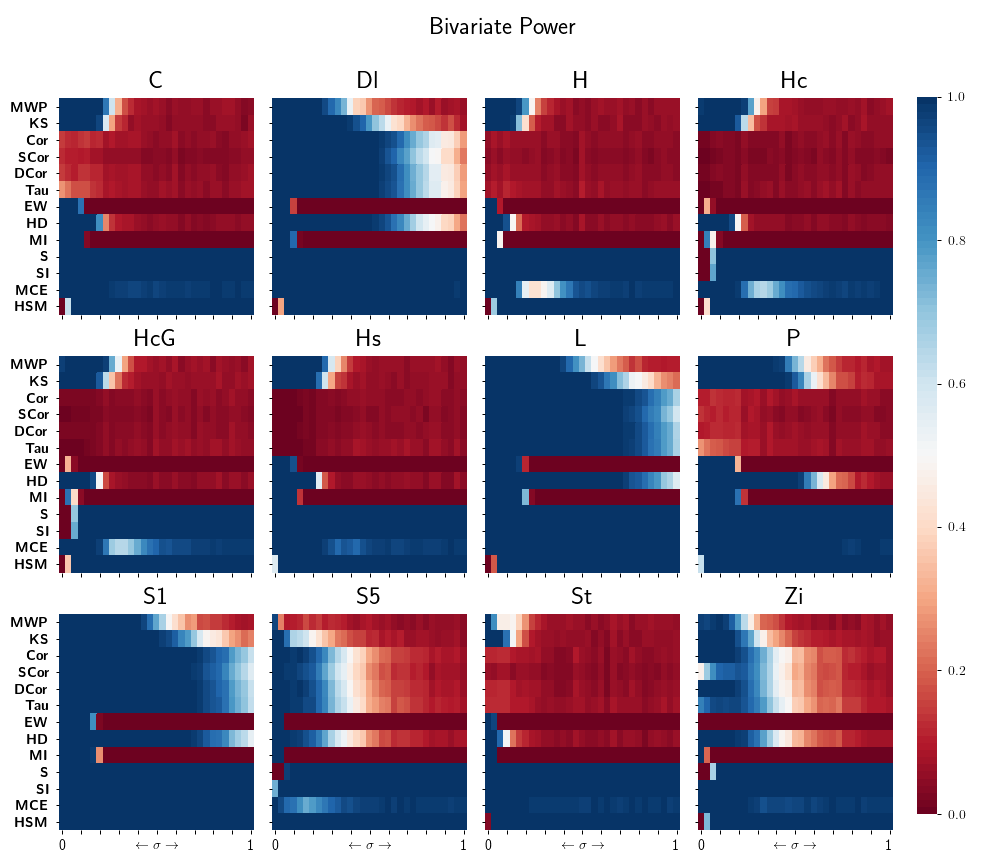

/Users/Mazan/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [79]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(14,12), sharey=True, sharex=True)
axess = axes.reshape(-1)
cbar_ax = fig.add_axes([.91, 0.058, .02, 0.83])

fig.suptitle("Bivariate Power", size = 24)

measure = "powerAt95"
nDim = 2

for i, dep in enumerate(sorted([x for x in selectedData["category"].unique() if x != "I"])):
    subdata = selectedData[(selectedData["category"] == dep) & (selectedData["nDim"] == nDim)]
    d = subdata.groupby(["noise","testId"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "testId"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['MWP', 'KS', 'Cor', 'SCor', 'DCor', 'Tau', 'EW', 'HD', 'MI', 'S', 'SI', 'MCE', 'HSM']) 
    dd = np.absolute(dd)

    ax = axess[i]
    
    sns.heatmap(dd, cmap=sns.color_palette("RdBu", 100), ax = ax, vmin=0, vmax=1,
                xticklabels=3, yticklabels = ['MWP', 'KS', 'Cor', 'SCor', 'DCor', 'Tau', 'EW', 'HD', 'MI', 'S', 'SI', 'MCE', 'HSM'],
                cbar=i == 0, cbar_ax=None if i else cbar_ax)

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)

    ax.set_title(r'%s'%(dep), y=1.02)
    ax.set_ylabel("")
    
    labels = ["" for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
    ax.set_xticklabels(labels)
    ax.set_xlabel('')
    
plt.tight_layout(rect=[0, 0, .9, 0.93])

fig.savefig("plots/BivariateFig7.pdf")

## Distribution of dependency estimation scores, d=2
(compareable to Fig 6)

<IPython.core.display.Javascript object>


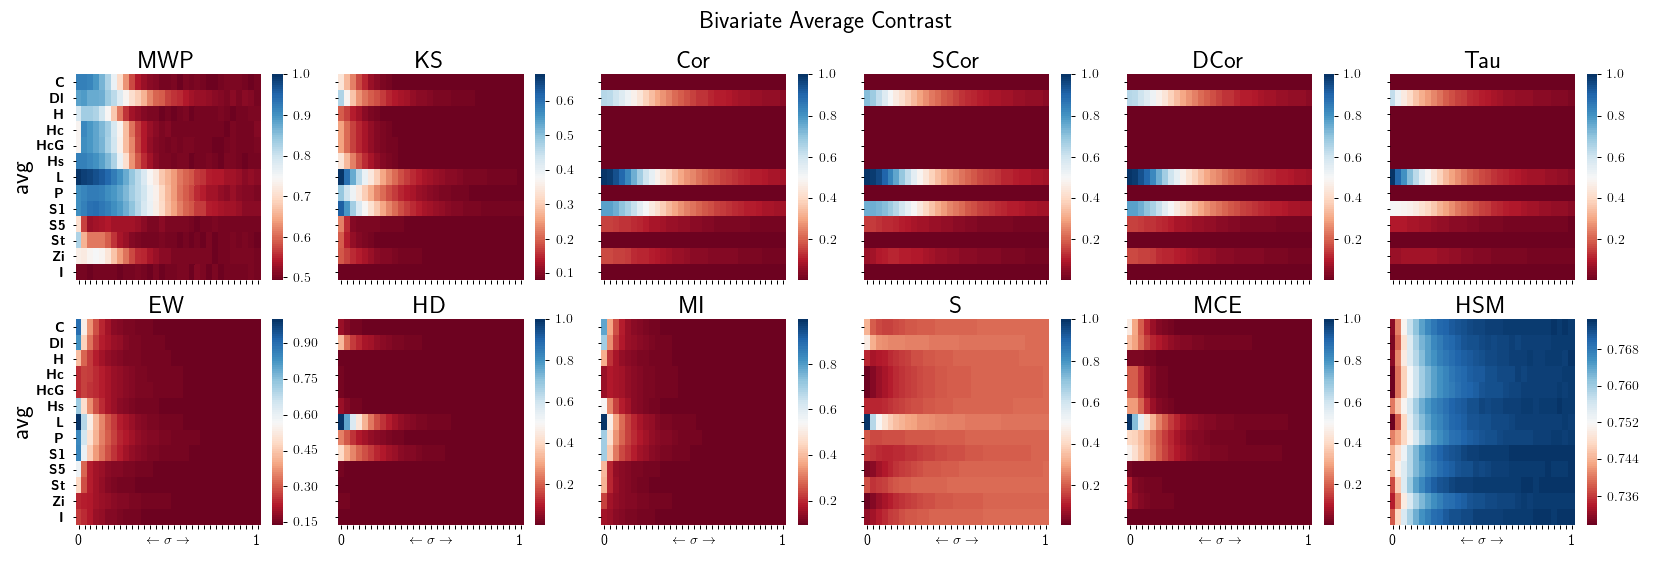

In [80]:
measure = "avgContrast"

fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(23,8), sharey=True, sharex=True)
axess = axes.reshape(-1)
nDim = 2

fig.suptitle("Bivariate Average Contrast", size = 24)

testlist = ['MWP', 'KS', 'Cor', 'SCor', 'DCor', 'Tau', 'EW', 'HD', 'MI', 'S', 'MCE','HSM']

for i,testId in enumerate(testlist):
    subdata = selectedData[(selectedData["testId"] == testId)  & (selectedData["nDim"] == nDim)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])
    
    ax = axess[i]
    
    dd = np.absolute(dd)
    
    if(testId == "MWP"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], 
                    ax=ax, vmax=1)
    
    else:
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), vmax=dd.max().max(), 
        xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], ax=ax)
    

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
    
    ax.set_title(r'%s'%(testId))
    ax.set_ylabel("")
    
    sp = [""]*int(((len(ax.get_xticklabels())-6)/5))
    ax.set_xticklabels(["0"] + sp + ["0.2"] + sp + ["0.4"] + sp + ["0.6"] + sp + ["0.8"] + sp + ["1"])
    
    ax.set_xlabel("")
    if(i % 6 == 0):
        ax.set_ylabel("avg")
    else:
        ax.set_ylabel("")
        
    labels = ["" for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
    ax.set_xticklabels(labels)
    ax.set_xlabel('')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.93])

fig.savefig("plots/BivariateFig6_avg.pdf")    

<IPython.core.display.Javascript object>


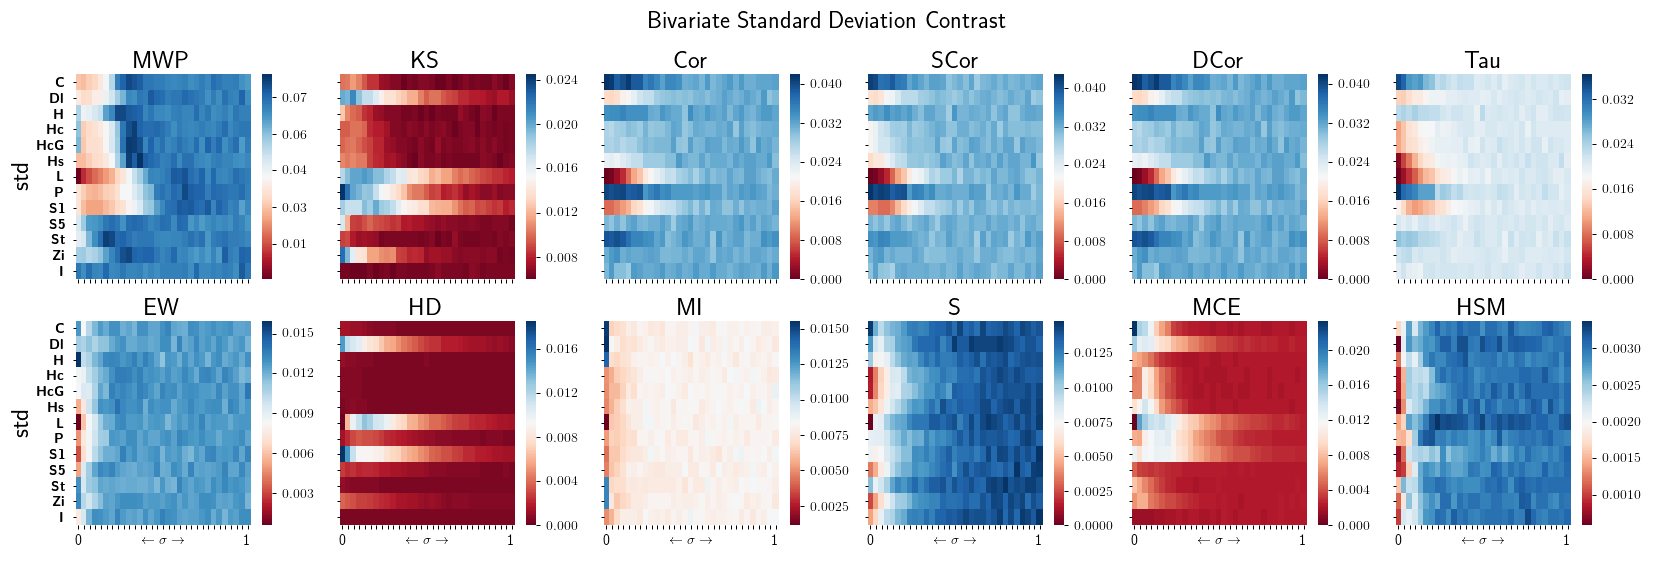

In [81]:
measure="stdContrast"

fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(23,8), sharey=True, sharex=True)
axess = axes.reshape(-1)
nDim = 2

fig.suptitle("Bivariate Standard Deviation Contrast", size = 24)

testlist = ['MWP', 'KS', 'Cor', 'SCor', 'DCor', 'Tau', 'EW', 'HD', 'MI', 'S', "MCE", 'HSM']

for i,testId in enumerate(testlist):
    subdata = selectedData[(selectedData["testId"] == testId)  & (selectedData["nDim"] == nDim)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', 'Dl', 'H', 'Hc', 'HcG', 'Hs', 'L', 'P', 'S1', 'S5', 'St', 'Zi', "I"])
    
    ax = axess[i]
    
    dd = np.absolute(dd)
    
    if(testId == "MWP"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), cbar_kws={'format': '$%.2f$'},
                xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], ax=ax)
    else:
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100),
                xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], ax=ax)
    
    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
    
    ax.set_title(r'%s'%(testId))
    ax.set_ylabel("")
    
    labels = ["" for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
    ax.set_xticklabels(labels)
    ax.set_xlabel('')
    
    if(i % 6 == 0):
        ax.set_ylabel("std")
    else:
        ax.set_ylabel("")
    
plt.tight_layout(rect=[0, 0.03, 1, 0.93])

fig.savefig("plots/BivariateFig6_std.pdf")

### Full Plot

<IPython.core.display.Javascript object>


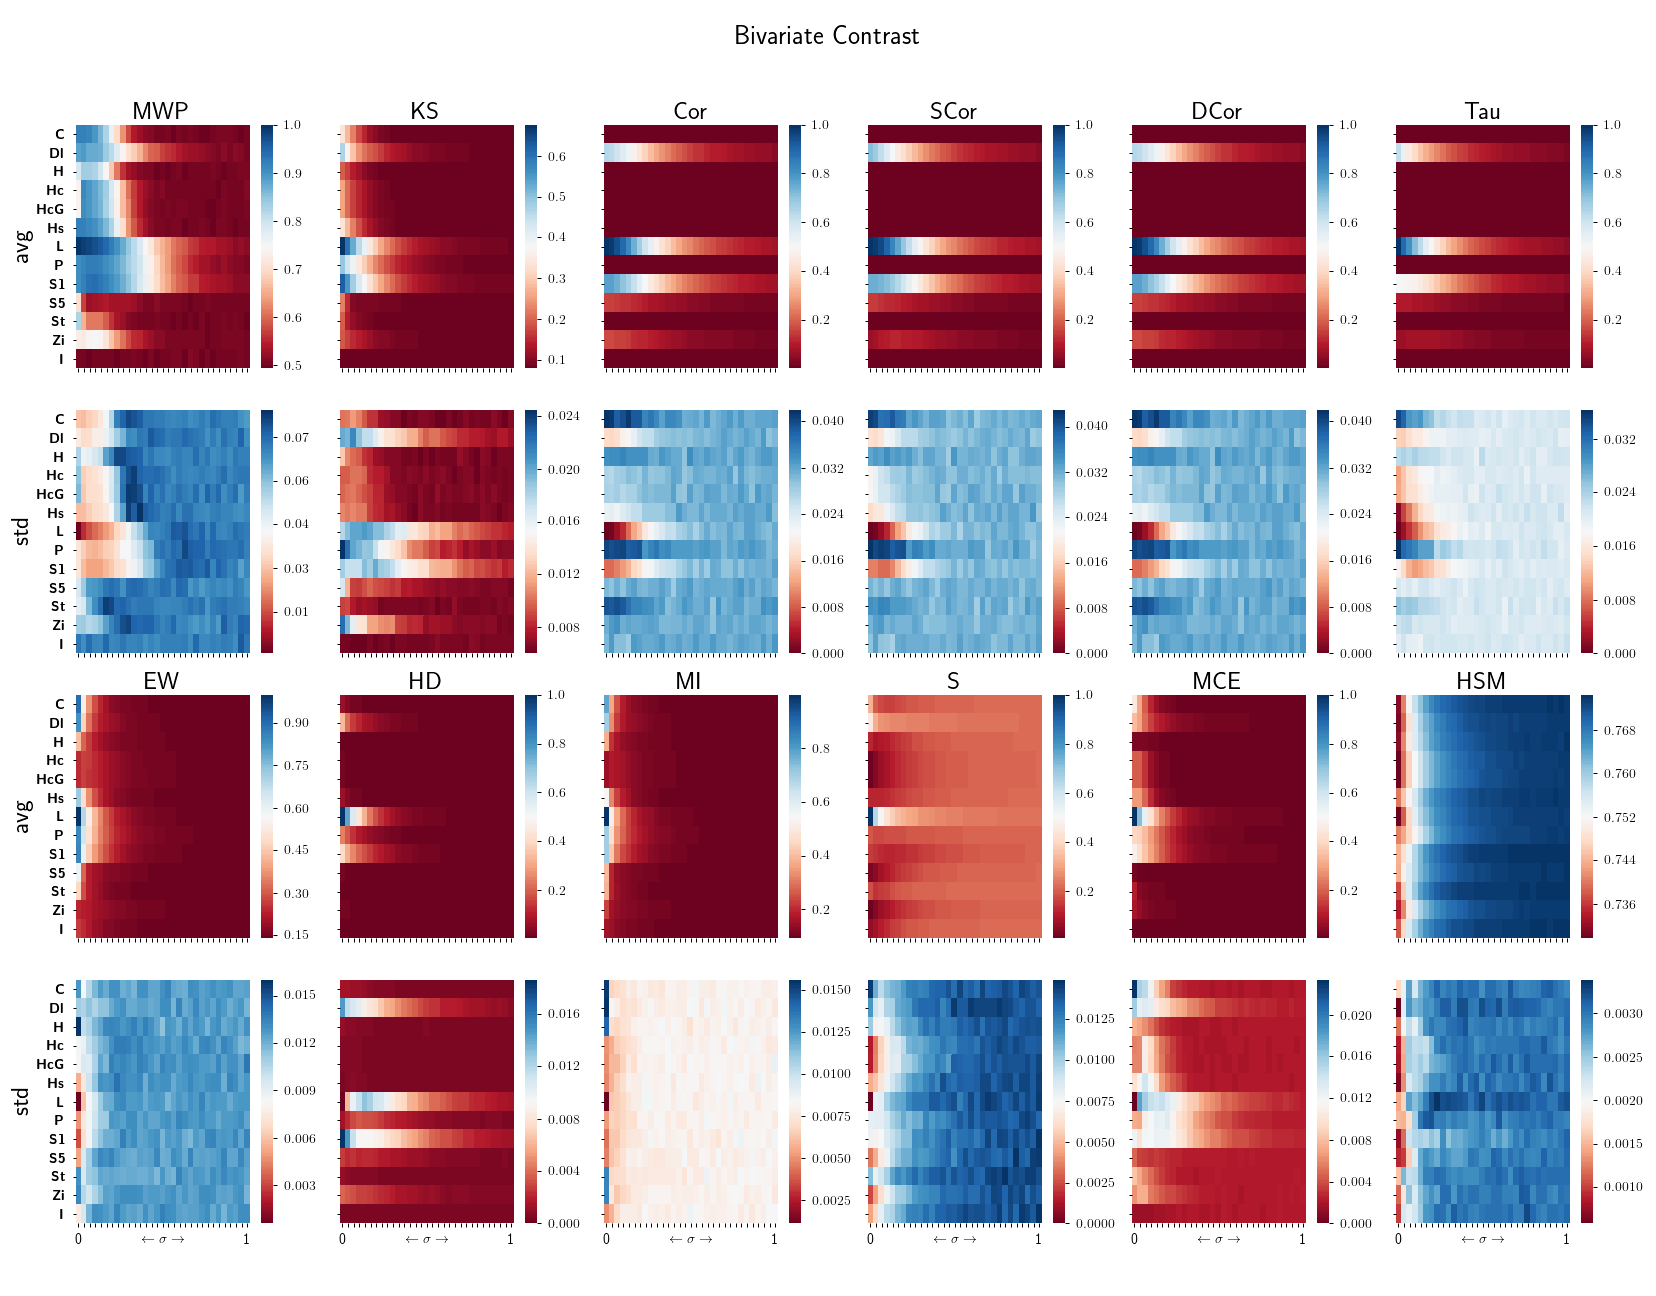

In [82]:
measure = "avgContrast"

fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(23,18), sharey=True, sharex=True)
nDim = 2

fig.suptitle("Bivariate Contrast", size = 26)

testlist = ['MWP', 'KS', 'Cor', 'SCor', 'DCor', 'Tau', 'EW', 'HD', 'MI', 'S', "MCE", 'HSM']

for i,testId in enumerate(testlist):
    subdata = selectedData[(selectedData["testId"] == testId)  & (selectedData["nDim"] == nDim)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])
    
    row = 2 if int(i/6) == 1 else 0
    
    ax = axes[row][i % 6]
    
    dd = np.absolute(dd)
    
    if(testId == "MWP"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), 
                    xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], 
                    ax=ax, vmax=1)
    
    else:
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), vmax=dd.max().max(), 
        xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], ax=ax)
    

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
    
    ax.set_title(r'%s'%(testId))
    ax.set_ylabel("")
    
    sp = [""]*int(((len(ax.get_xticklabels())-6)/5))
    ax.set_xticklabels(["0"] + sp + ["0.2"] + sp + ["0.4"] + sp + ["0.6"] + sp + ["0.8"] + sp + ["1"])
    
    ax.set_xlabel("")
    if(i % 6 == 0):
        ax.set_ylabel("avg")
    else:
        ax.set_ylabel("")


measure="stdContrast"
for i,testId in enumerate(testlist):
    subdata = selectedData[(selectedData["testId"] == testId)  & (selectedData["nDim"] == nDim)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', 'Dl', 'H', 'Hc', 'HcG', 'Hs', 'L', 'P', 'S1', 'S5', 'St', 'Zi', "I"])
    
    row = 3 if int(i/6) == 1 else 1
    
    ax = axes[row][i % 6]
    
    dd = np.absolute(dd)
    
    if(testId == "MWP"):
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), cbar_kws={'format': '$%.2f$'},
                xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], ax=ax)
    else:
        sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100),
                xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], ax=ax)
    
    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
    
    # ax.set_title(r'%s'%(testId))
    ax.set_title("")
    ax.set_ylabel("")
    
    labels = ["" for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
    ax.set_xticklabels(labels)
    ax.set_xlabel('')
    
    if(i % 6 == 0):
        ax.set_ylabel("std")
    else:
        ax.set_ylabel("")
    
plt.tight_layout(rect=[0, 0.03, 1, 0.93])

fig.savefig("plots/BivariateFig6_full.pdf")